# Data Wrangling and EDA

### a. Movies Dataset

In [2]:
# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#Loading Dataset
m_data = pd.read_csv('/Users/Atabay/Desktop/Movie_Recommendation_System_data/Raw_data/tmdb_5000_movies.csv')

In [4]:
m_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### a. Handling Missing Data

In [5]:
m_data.shape

(4803, 20)

In [6]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
#Checking for null values
m_data.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

There are null values in homepage and tagline columns. Removing them will not have any effect on our recommendation system.

In [12]:
#Removing columns
m_data.drop(["homepage", "tagline"], axis=1, inplace=True)

KeyError: "['homepage' 'tagline'] not found in axis"

In [15]:
# Finding the movies having null overview
m_data[m_data.overview.isnull()]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,"To Be Frank, Sinatra at 100",0.0,0
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",292539,[],de,Food Chains,NaN,0.795698,[],[],2014-04-26,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Food Chains,7.4,8


In [30]:
# Filling null values in overivew column by making a web search.
m_data.overview[m_data.id == 370980] = "The story of Pope Francis' life."
m_data.overview[m_data.id == 459488] = "The life of Frank Sinatra, as an actor and singer and the steps along the way that led him to become such an icon."
m_data.overview[m_data.id == 292539] = "To protest their working conditions and poor wages, farmworkers in Immokalee, Florida, start a hunger strike outside the headquarters of Publix supermarkets."


<ipython-input-30-3e821cee33e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_data.overview[m_data.id == 370980] = "The story of Pope Francis' life."
<ipython-input-30-3e821cee33e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_data.overview[m_data.id == 459488] = "The life of Frank Sinatra, as an actor and singer and the steps along the way that led him to become such an icon."
<ipython-input-30-3e821cee33e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [32]:
m_data.isna().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [33]:
# Finding the movies having null release date
m_data[m_data.release_date.isnull()]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
4553,0,[],380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,America Is Still the Place,0.0,0


It seems that most of the features are null for this movie so it is better to drop it. 

In [38]:
m_data = m_data.drop(4553)

In [39]:
m_data.shape

(4802, 18)

In [43]:
m_data.isna().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

We have 2 null values in runtime column

In [46]:
m_data[m_data.runtime.isnull()]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100","The life of Frank Sinatra, as an actor and sin...",0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,"To Be Frank, Sinatra at 100",0.0,0


In [48]:
# Filling null values in overivew column by making a web search.
m_data.runtime[m_data.id == 370980] = 98
m_data.runtime[m_data.id == 459488] = 81


<ipython-input-48-f2214bcd7c35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_data.runtime[m_data.id == 370980] = 98
<ipython-input-48-f2214bcd7c35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_data.runtime[m_data.id == 459488] = 81


In [50]:
m_data.isna().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

We don't have any null values anymore.

### b. Duplicate Values

In [51]:
# Checking for duplicate values
m_data[m_data.duplicated(keep=False)].sort_values('id')

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count


### c. Checking Outliers

In [52]:
m_data.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4802.0,2.905109e+07,4.072447e+07,0.000000,800000.000000,1.500000e+07,4.000000e+07,3.800000e+08
id,4802.0,5.709823e+04,8.858130e+04,5.000000,9013.750000,1.462650e+04,5.858975e+04,4.594880e+05
popularity,4802.0,2.149678e+01,3.181845e+01,0.000372,4.671734,1.292493e+01,2.833202e+01,8.755813e+02
revenue,4802.0,8.227777e+07,1.628697e+08,0.000000,0.000000,1.917498e+07,9.291920e+07,2.787965e+09
runtime,4802.0,1.068909e+02,2.256035e+01,0.000000,94.000000,1.030000e+02,1.177500e+02,3.380000e+02
vote_average,4802.0,6.093440e+00,1.191496e+00,0.000000,5.600000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4802.0,6.903617e+02,1.234674e+03,0.000000,54.000000,2.355000e+02,7.370000e+02,1.375200e+04


Many values in revenue seems to be zero. This means either revenue information is not avaliable or these movies were not shown in theaters. 

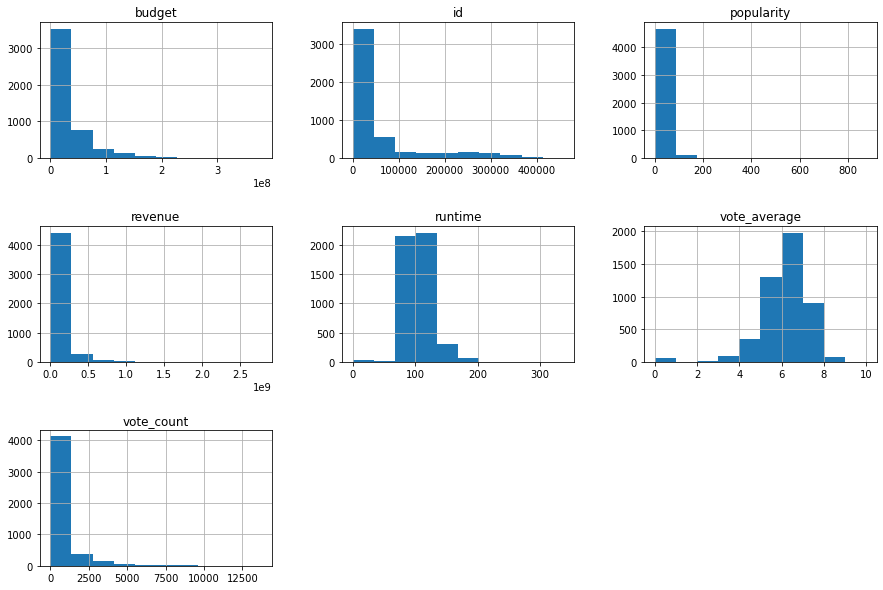

In [53]:
m_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [54]:
m_data[m_data.revenue != 0]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4775,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",33693,"[{""id"": 171993, ""name"": ""mumblecore""}]",en,Funny Ha Ha,"Unsure of what to do next, 23-year-old Marnie ...",0.362633,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2002-09-20,76901,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Funny Ha Ha,6.3,8
4788,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",692,"[{""id"": 237, ""name"": ""gay""}, {""id"": 900, ""name...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,"[{""name"": ""Dreamland Productions"", ""id"": 407}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-12,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pink Flamingos,6.2,110
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,"[{""name"": ""Daiei Studios"", ""id"": 881}]","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,Cure,7.4,63
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,"[{""id"": 1448, ""name"": ""distrust""}, {""id"": 2101...",en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,"[{""name"": ""Thinkfilm"", 

This shows that many movies have revenue of zero. This indicates either they didn't earn any money from ticket sales or this information is not avaliable. Removing revenue column from the dataset would make the analysis more coherent.

In [56]:
#Dropping the revenue column
m_data.drop(["revenue"], axis=1, inplace=True)

KeyError: "['revenue'] not found in axis"

In [57]:
m_data.shape

(4802, 17)

Now, the dataset is clean and ready for modeling 

In [58]:
#Save the dataset
m_data.to_csv('/Users/Atabay/Desktop/Movie_Recommendation_System_data/Data/m_data_cleaned.csv', index = False)

### b. Credits Dataset

In [59]:
#Loading Dataset
c_data = pd.read_csv('/Users/Atabay/Desktop/Movie_Recommendation_System_data/Raw_data/tmdb_5000_credits.csv')

In [60]:
c_data.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [61]:
c_data.shape

(4803, 4)

In [62]:
#Checking for null values
c_data.isna().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

No null values

In [63]:
# Checking for duplicate values
c_data[c_data.duplicated(keep=False)].sort_values('movie_id')

,movie_id,title,cast,crew


There are no duplicate values.

Credits data is ready for modeling.

In [64]:
#Save the dataset
c_data.to_csv('/Users/Atabay/Desktop/Movie_Recommendation_System_data/Data/c_data_cleaned.csv', index = False)